Final Project Code 414

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
url = "https://raw.githubusercontent.com/joniaco0/INST414/main/maindata_cleaned.csv"
df = pd.read_csv(url)

In [ ]:
df_cleaned = df.dropna(subset=['WAR', 'PA', 'pythW', 'WARSHARE'])
features = ['WAR', 'PA', 'pythW', 'WARSHARE']
X = df_cleaned[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

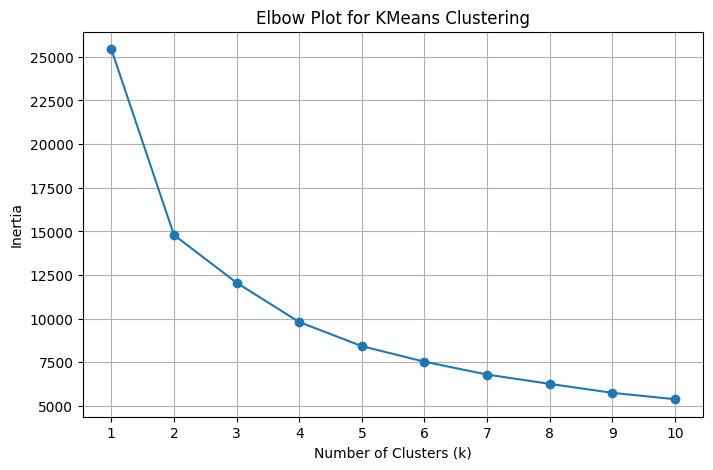

In [ ]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Plot for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\jiaco\AppData\Local\Temp\ipykernel_14976\165780788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = kmeans.fit_predict(X_scaled)


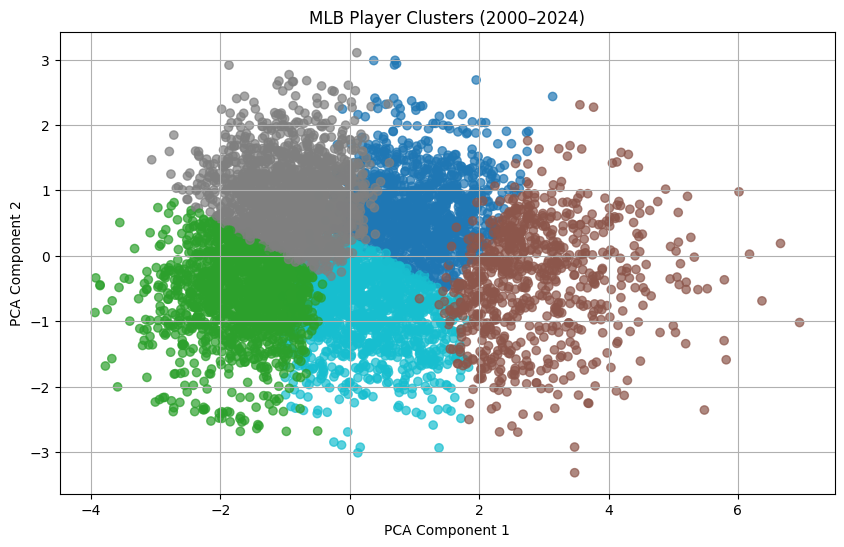

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(components[:, 0], components[:, 1], c=df_cleaned['Cluster'], cmap='tab10', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('MLB Player Clusters (2000–2024)')
plt.grid(True)
plt.show()

In [ ]:
for cluster_id in sorted(df_cleaned['Cluster'].unique()):
    print(f"\n--- Cluster {cluster_id} ---")

    cluster_players = df_cleaned[df_cleaned['Cluster'] == cluster_id]

    count = len(cluster_players)
    mean_war = cluster_players['WAR'].mean()
    std_war = cluster_players['WAR'].std()
    mean_share = cluster_players['WARSHARE'].mean()
    std_share = cluster_players['WARSHARE'].std()
    mean_pythw = cluster_players['pythW'].mean()
    min_war = cluster_players['WAR'].min()
    max_war = cluster_players['WAR'].max()

    print(f"Total Players: {count}")
    print(f"Avg WAR: {mean_war:.2f} (±{std_war:.2f})")
    print(f"Avg WARSHARE: {mean_share:.3f} (±{std_share:.3f})")
    print(f"Avg PythW: {mean_pythw:.2f}")
    print(f"WAR Range: {min_war} to {max_war}")


    top_players = cluster_players.sort_values(by='WARSHARE', ascending=False).head(5)
    print("\nTop 5 Players by WARSHARE:")
    print(top_players[['Name', 'Season', 'Team', 'WAR', 'pythW', 'WARSHARE']])



--- Cluster 0 ---
Total Players: 1257
Avg WAR: 3.05 (±0.99)
Avg WARSHARE: 0.033 (±0.011)
Avg PythW: 92.00
WAR Range: -0.1 to 6.1

Top 5 Players by WARSHARE:
                Name  Season Team  WAR  pythW  WARSHARE
4650     Carlos Ruiz  2012.0  PHI  4.5   81.0  0.055556
6086  Hanley Ramirez  2013.0  LAD  4.9   89.0  0.055056
2536   Justin Turner  2017.0  LAD  5.6  102.0  0.054902
3524    Jayson Werth  2008.0  PHI  5.1   93.0  0.054839
4241     Nelson Cruz  2010.0  TEX  4.9   91.0  0.053846

--- Cluster 1 ---
Total Players: 1484
Avg WAR: 0.31 (±0.91)
Avg WARSHARE: 0.004 (±0.013)
Avg PythW: 69.92
WAR Range: -3.1 to 2.7

Top 5 Players by WARSHARE:
                 Name  Season Team  WAR  pythW  WARSHARE
6227       Zack Gelof  2023.0  OAK  2.7   49.0  0.055102
5974    Tyler Flowers  2016.0  ATL  2.5   67.0  0.037313
6043        Joe Mauer  2011.0  MIN  2.3   62.0  0.037097
5826       Julio Lugo  2006.0  TBR  2.4   65.0  0.036923
6161  Justin Ruggiano  2012.0  MIA  2.5   68.0  0.036765

--- C

In [ ]:
from scipy.stats import percentileofscore
from sklearn.metrics.pairwise import cosine_similarity

def find_player_in_cluster(name, season, top_n=5):
    season = str(season).strip()
    name = name.strip()

    df_cleaned['Name_clean'] = df_cleaned['Name'].str.strip()
    df_cleaned['Season_str'] = df_cleaned['Season'].astype(str)

    result = df_cleaned[(df_cleaned['Name_clean'] == name) &
                        (df_cleaned['Season_str'] == season)]

    if result.empty:
        print(f"No exact match for {name} in {season}.")
        similar = df_cleaned[df_cleaned['Name_clean'] == name]
        if not similar.empty:
            print("Found these seasons:")
            print(similar[['Name', 'Season', 'Team', 'WAR']].sort_values(by='Season'))
        else:
            print("No player with that name found.")
        return

    player = result.iloc[0]
    player_id = f"{player['Name']}_{player['Season']}"

    war_pct = percentileofscore(df_cleaned['WAR'], player['WAR'])
    pa_pct = percentileofscore(df_cleaned['PA'], player['PA'])
    share_pct = percentileofscore(df_cleaned['WARSHARE'], player['WARSHARE'])

    print(f"\nPlayer: {player['Name']} ({player['Season']}) — Team: {player['Team']}")
    print(f"Cluster: {player['Cluster']}")
    print(f"WAR: {player['WAR']}  — Percentile: {war_pct:.1f}")
    print(f"PA: {player['PA']}  — Percentile: {pa_pct:.1f}")
    print(f"WARSHARE: {player['WARSHARE']:.4f}  — Percentile: {share_pct:.1f}")
    print(f"PythW: {player['pythW']}")


    query_vector = X_scaled_df.loc[[player_id]].drop(columns=[
        'Cluster', 'Name', 'Season', 'Team', 'WAR', 'pythW', 'WARSHARE'
    ])
    all_vectors = X_scaled_df.drop(index=player_id)
    feature_vectors = all_vectors.drop(columns=[
        'Cluster', 'Name', 'Season', 'Team', 'WAR', 'pythW', 'WARSHARE'
    ])

    similarities = cosine_similarity(query_vector, feature_vectors).flatten()
    all_vectors = all_vectors.copy()
    all_vectors['Similarity'] = similarities

    top_similar = all_vectors.sort_values(by='Similarity', ascending=False).head(top_n)

    print(f"\nTop {top_n} Most Similar Player-Seasons:")
    for i, row in top_similar.iterrows():
        print(f"{row['Name']} ({row['Season']}, {row['Team']}) — WAR: {row['WAR']}, "
              f"WARSHARE: {row['WARSHARE']:.4f}, Similarity: {row['Similarity']:.4f}")
find_player_in_cluster("Aaron Judge",2024.0)


Player: Aaron Judge (2024.0) — Team: NYY
Cluster: 2
WAR: 11.2  — Percentile: 100.0
PA: 704.0  — Percentile: 96.5
WARSHARE: 0.1167  — Percentile: 99.9
PythW: 96.0

Top 5 Most Similar Player-Seasons:
Alex Rodriguez (2000, SEA) — WAR: 9.5, WARSHARE: 0.1033, Similarity: 0.9994
Ryan Braun (2011, MIL) — WAR: 7.1, WARSHARE: 0.0789, Similarity: 0.9993
Buster Posey (2016, SFG) — WAR: 6.7, WARSHARE: 0.0744, Similarity: 0.9992
Carlos Beltrán (2006, NYM) — WAR: 7.8, WARSHARE: 0.0857, Similarity: 0.9991
Buster Posey (2015, SFG) — WAR: 6.8, WARSHARE: 0.0764, Similarity: 0.9990


C:\Users\jiaco\AppData\Local\Temp\ipykernel_14976\487170963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Name_clean'] = df_cleaned['Name'].str.strip()
C:\Users\jiaco\AppData\Local\Temp\ipykernel_14976\487170963.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Season_str'] = df_cleaned['Season'].astype(str)
